<h1>W1D2 Assignment 2 </h1>
Siddharth Panda 1705919 (House Nairobi)
<hr>

In [142]:
import pandas as pd
import numpy as np
from numpy import nan
import string
import matplotlib.pyplot as plt
%matplotlib inline

### PANDAS

#### Q1. Given a DataFrame of random numeric values, how do you subtract the row mean from each element in the row?

In [15]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)

          0         1         2
0  0.067126  0.775037  0.965151
1  0.007681  0.892314  0.916975
2  0.042377  0.743561  0.172481
3  0.240249  0.976490  0.424567
4  0.990968  0.529542  0.653899


In [16]:
"""
Iterate through each row, while subtracting it from it's mean
"""

for i in range(df.shape[0]):
    df.iloc[i] -= df.iloc[i].mean()
print(df)

          0         1         2
0 -0.535312  0.172599  0.362713
1 -0.597976  0.286657  0.311319
2 -0.277096  0.424088 -0.146992
3 -0.306853  0.429388 -0.122535
4  0.266165 -0.195261 -0.070904


---
#### Q2. You have a DataFrame df that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values

In [29]:
# Given data
data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

df = pd.DataFrame(data, columns=list(string.ascii_lowercase[:10]))
print(df)


      a   b     c     d     e     f     g     h     i     j
0  0.04 NaN   NaN  0.25   NaN  0.43  0.71  0.51   NaN   NaN
1   NaN NaN   NaN  0.04  0.76   NaN   NaN  0.67  0.76  0.16
2   NaN NaN  0.50   NaN  0.31  0.40   NaN   NaN  0.24  0.01
3  0.49 NaN   NaN  0.62  0.73  0.26  0.85   NaN   NaN   NaN
4   NaN NaN  0.41   NaN  0.05   NaN  0.61   NaN  0.48  0.68
0.04


In [63]:
def nan_col_list(df):
    """
    Returns a list of column names containing the third NaN of the row
    """
    
    r, c = df.shape
    col_list = []
    for i in range(r):
        nan_count = 0
        for j in range(c):
            if np.isnan(df.iloc[i, j]):
                nan_count += 1
                
            if nan_count == 3:
                col_list.append(df.columns[j])
                break
                
    return col_list

In [64]:
print(nan_col_list(df))

['e', 'c', 'd', 'h', 'd']


---
#### Q4. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

We can sum the result of duplicated() function applied on the whole dataframe.

In [69]:
# The demo_df has 1 duplicate record

demo_df = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]])
print(demo_df)

   0  1  2
0  1  2  3
1  1  2  3
2  4  5  6


In [70]:
demo_df.duplicated().sum()

1

We subtract this value from the original number of rows, to get the number of unique rows present in the data frame.

In [72]:
num_unique_rows = demo_df.shape[0] - demo_df.duplicated().sum()
print(num_unique_rows)

2


---
#### Q5. A DataFrame has a column of groups 'grps' and and column of integer values 'vals'. For each group, find the sum of the three greatest values.

In [75]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), \
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df.head())

  grps  vals
0    a    12
1    a   345
2    a     3
3    b     1
4    b    45


In [91]:
group = df.groupby('grps')
final_data = []
for name, g in group:
    final_data.append([name, sum(g.sort_values('vals', ascending=False)['vals'].iloc[:3])])

In [92]:
result = pd.DataFrame(final_data)
print(result)

   0    1
0  a  409
1  b  156
2  c  345


---
### NUMPY 

#### Q1. Create a numpy array containing the first 100 elements(1-100). Now create a new array that has 1 in places where the element is divisible by 4 and 0 if not.

In [97]:
data = np.array(range(1, 101))
result = np.where(data % 4 == 0, 1, 0)
print(result)

[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]


---
#### Q2. 2D Matrix multiplication using numpy arrays( The dimensions of the two arrays have to be given through user input. Values present in the arrays can be chosen by you )

In [98]:
print("Enter the shape of the first matrix: ")
a, b = tuple(map(int, input().split(' ')))
print("Enter the shape of the second matrix: ")
c, d = tuple(map(int, input().split(' ')))

m1 = np.random.random(size=(a,b))
m2 = np.random.random(size=(c,d))
print(np.dot(m1, m2))

Enter the shape of the first matrix: 


 3 4


Enter the shape of the second matrix: 


 4 5


---
#### Q3. Create a numpy array of length 100 containing random numbers in the range of (0-10). Now perform the following operations :


In [130]:
data = np.random.randint(0, 10, size=100)
print("ORIGINAL ARRAY:\n", data)

ORIGINAL ARRAY:
 [7 4 8 5 5 7 8 4 8 7 8 4 1 3 5 2 6 9 2 2 0 7 0 1 1 0 7 3 8 6 5 8 2 1 5 7 8
 9 4 5 7 4 5 9 9 0 1 8 2 5 5 8 0 3 8 7 2 1 0 6 3 1 7 6 6 6 6 2 5 0 7 9 3 6
 6 5 3 7 5 2 7 8 4 5 5 1 7 0 2 1 6 6 3 4 0 6 1 0 7 8]


##### i) Add 1 to each element

In [131]:
data += 1

##### ii) Multiply each element with 2

In [132]:
data *= 2

##### iii) Subtract 2 from each element

In [133]:
data -= 2

In [134]:
print("FINAL ARRAY:\n", data)

FINAL ARRAY:
 [14  8 16 10 10 14 16  8 16 14 16  8  2  6 10  4 12 18  4  4  0 14  0  2
  2  0 14  6 16 12 10 16  4  2 10 14 16 18  8 10 14  8 10 18 18  0  2 16
  4 10 10 16  0  6 16 14  4  2  0 12  6  2 14 12 12 12 12  4 10  0 14 18
  6 12 12 10  6 14 10  4 14 16  8 10 10  2 14  0  4  2 12 12  6  8  0 12
  2  0 14 16]


---
### MATPLOTLIB

#### Q1. Find the top 5 movies using a count plot.

In [152]:
# Loading the movie data set
df = pd.read_csv("movies_dataset.csv")
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


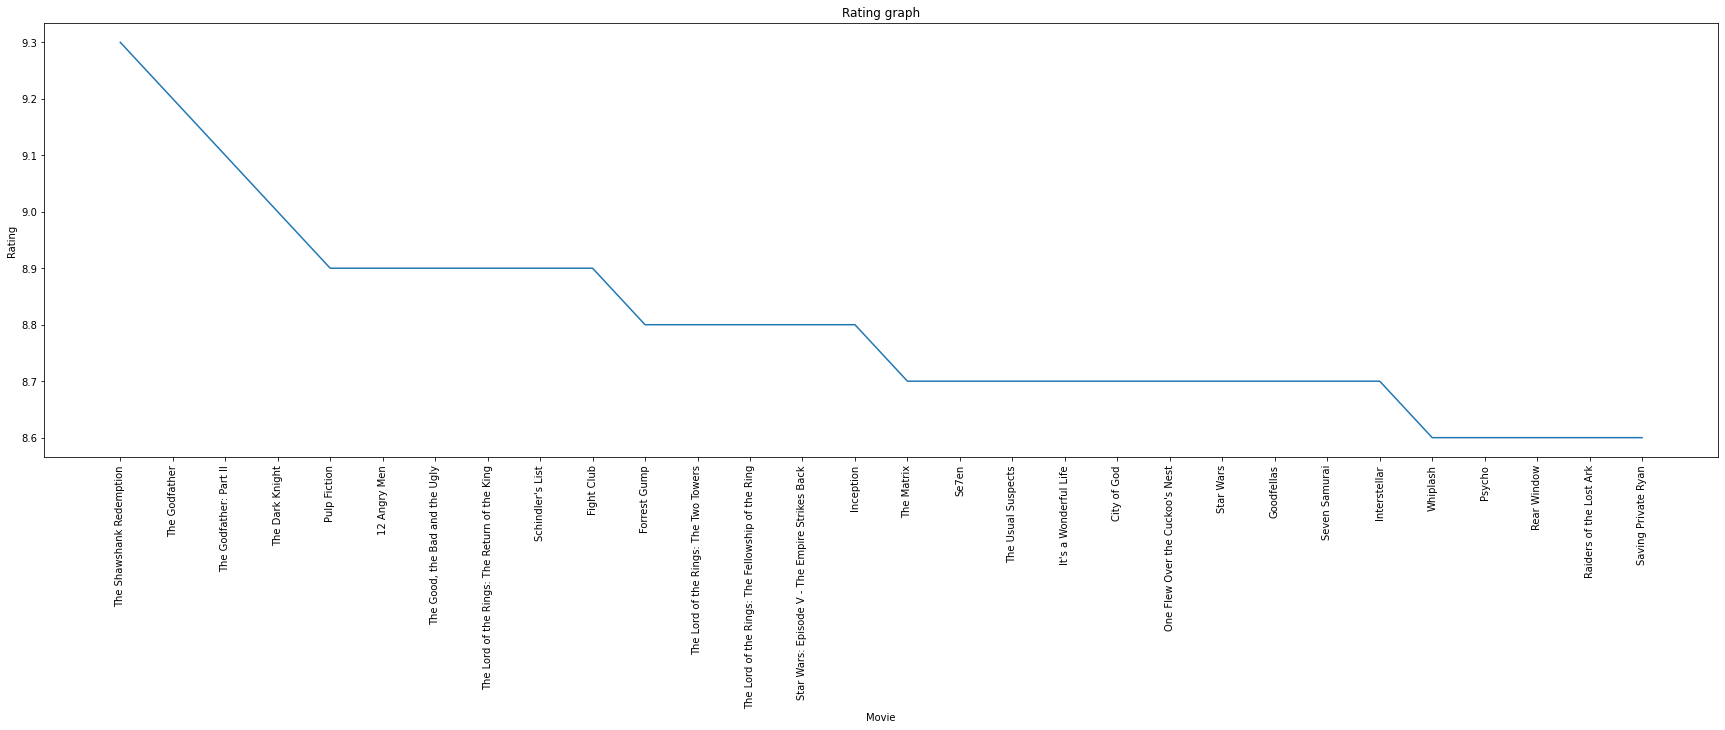

In [183]:
# Line plot for star rating of each movie

plt.figure(figsize=(30, 8))
plt.title("Rating graph")
plt.xlabel("Movie")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.plot('title', 'star_rating', data=df.sort_values('star_rating', ascending=False).iloc[:30])
plt.show()

From the graph, we can deduce that the top 5 movies are :
- The Shawshank Redemption
- The Godfather
- The Godfather, Part II
- The Dark Knight
- Pulp Fiction

---
#### Q2. Display the distribution of the duration column.

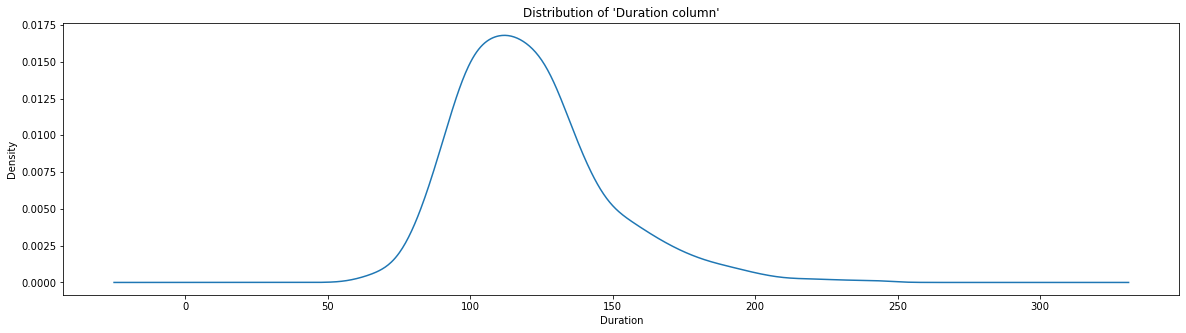

In [184]:
plt.figure(figsize=(20, 5))
plt.title("Distribution of 'Duration column'")
plt.xlabel("Duration")
plt.ylabel("Density")
df['duration'].plot.kde()
plt.show()